Jonathan Christopher Gani  
2702223084

## Cirrhosis

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 65.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import shapiro, stats
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb

# 1.A

In [3]:
# read file 1A with tsv extension
dataset = pd.read_csv('1A.tsv', sep='\t') # using /t (tab) separator to read the data
dataset

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,2023/01/30,NaN,1957/12/11,F,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3
414,415,2021/12/04,NaN,1985/12/11,F,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4
415,416,2022/01/21,NaN,1967/12/12,F,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3
416,417,2023/01/20,NaN,1966/12/11,F,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3


## Dataset Source
https://bit.ly/49A1kBX

As we can see here there are 18 attributes / columns with 'ID' as the ID column and 'Stage' as the predicted label. The dataset is pretty small, consisting only 418 rows which a little bit tight to do the modelling process, but still able to do it.  


So, this dataset is trying to predict / estimate each patient health conditions by the stages of cirrhosis based on the other existing features except 'Stage'. Because the 'Stage' is the predicted one so it becomes y and the rest of it become the x.  

This stage cirrhosis prediction is crucial, because it helps the diagnosis process faster, improving accuracy, and providing objective results based on each patient's personal health information. Hopefully i can predict the cirrhosis stage accurately by using all the available features for each patient.



## Dataset Information

In [4]:
dataset.info() # checking the datatypes of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

In [5]:
dataset.describe() # showing the statistical summary only for numerical features / columns

,ID,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,80.000000,418.000000,310.000000,312.000000,312.000000,418.000000,407.000000,416.000000
mean,209.500000,3.220813,358.662500,3.497440,97.648387,1982.655769,122.556346,83.803828,257.024570,10.731731
std,120.810458,4.407506,230.414099,0.424972,85.613920,2140.388824,56.699525,79.603693,98.325585,1.022000
min,1.000000,0.300000,149.000000,1.960000,4.000000,289.000000,26.350000,-1.000000,62.000000,9.000000
25%,105.250000,0.800000,236.000000,3.242500,41.250000,871.500000,80.600000,-1.000000,188.500000,10.000000
50%,209.500000,1.400000,284.500000,3.530000,73.000000,1259.000000,114.700000,85.000000,251.000000,10.600000
75%,313.750000,3.400000,409.500000,3.770000,123.000000,1980.000000,151.900000,127.750000,318.000000,11.100000
max,418.000000,28.000000,1480.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


## Remove Identifier and Registration Date Column

In [6]:
# because the 'ID' and 'Registration Date' column won't be used for predicting the labels, therefore i'll drop them from the beginning.
dataset.drop(columns=['ID', 'Registration Date'], inplace=True)
dataset
# here i'm dropping the ID column first in order to identify the duplication, because the 'ID' column consist all unique values, which might leads the duplication will not be identified
# i also delete Registration Date	column because it doesn't affect the prediction process
# now the total column are 16

,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,1957/12/11,F,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3
414,NaN,1985/12/11,F,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4
415,NaN,1967/12/12,F,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3
416,NaN,1966/12/11,F,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3


## Converting Birth Date Data Types

In [7]:
# calculate age from Birth Date column
curr = datetime.now().year # return current year
dataset['Age'] = curr - pd.to_datetime(dataset['Birth Date']).dt.year # curr year - birth date year

# drop Birth Date column
dataset = dataset.drop(columns=['Birth Date'])

In [8]:
dataset # as we can see here, the Birth Date column is already gone and the Age column is added

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,D-penicillamine,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4,59
1,D-penicillamine,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3,57
2,D-penicillamine,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4,71
3,D-penicillamine,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4,55
4,Placebo,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,F,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3,68
414,NaN,F,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4,40
415,NaN,F,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3,58
416,NaN,F,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3,59


In [9]:
dataset.info() # now the age column data type is int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       312 non-null    object 
 1   Gender                     418 non-null    object 
 2   Ascites                    312 non-null    object 
 3   Hepatomegaly               312 non-null    object 
 4   Edema                      418 non-null    object 
 5   Bilirubin                  418 non-null    float64
 6   Cholesterol                80 non-null     float64
 7   Albumin                    418 non-null    float64
 8   Copper                     310 non-null    float64
 9   Alkaline Phospatase (U/L)  312 non-null    float64
 10  SGOT                       312 non-null    float64
 11  Tryglicerides              418 non-null    float64
 12  Platelets                  407 non-null    float64
 13  Prothrombin                416 non-null    float64

## Fixing Misspelled Drug Attributes

In [10]:
dataset['Drug'].value_counts()  # this is the original data

,count
Drug,
D-penicillamine,155
Placebo,152
d-penicillamine,3
placebo,1
lacebo,1


In [11]:
# replacing all the missspelled values
dataset['Drug'] = dataset['Drug'].replace({'d-penicillamine': 'D-penicillamine', 'placebo': 'Placebo', 'lacebo': 'Placebo'})

dataset['Drug'].value_counts() # now all the misspelled already fixed

,count
Drug,
D-penicillamine,158
Placebo,154


## Duplicated Values

In [12]:
# checking total duplication
dataset.duplicated().sum() # the dataset is quite clean in aspect of duplication, because there are no duplication detected on this dataset
# therefore none of them needs to be removed

0

## Missing Values

In [13]:
# check missing values
dataset.isna().sum() # as we can see here, there are many missing values for some columns in this dataset

,0
Drug,106
Gender,0
Ascites,106
Hepatomegaly,106
Edema,0
Bilirubin,0
Cholesterol,338
Albumin,0
Copper,108
Alkaline Phospatase (U/L),106


In [14]:
# based on the missing value summary above, now i have 2 options either i'll drop all the missing values or i'll do the imputation
# since this dataset is about patients health conditions, we must avoid any synthetic data so the model won't be bias, because it's crucial for healh conditions
# therefore i decided to drop all the  only conmissing values
# but there's another issue here, as we know the datasetsist of 418 rows which is pretty small. But the missing values of Cholesterol is a bit too much
# If i drop all the Cholestrol missing values, only 80 rows remaining which is too little to make the prediction model
# So i'll exclude the 'Cholestrol' column by dropping this column.
dataset.drop(columns=['Cholesterol'], inplace=True)
dataset
# now the columns remaining is 15

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,D-penicillamine,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4,59
1,D-penicillamine,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3,57
2,D-penicillamine,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4,71
3,D-penicillamine,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4,55
4,Placebo,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,F,NaN,NaN,N,1.2,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3,68
414,NaN,F,NaN,NaN,N,0.9,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4,40
415,NaN,F,NaN,NaN,N,1.6,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3,58
416,NaN,F,NaN,NaN,N,0.8,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3,59


In [15]:
# dropping the rest of missing values
dataset = dataset.dropna().reset_index(drop=True) # dropping all the rows consisting NaN

In [16]:
dataset.isna().sum() # now, all the missing values are gone

,0
Drug,0
Gender,0
Ascites,0
Hepatomegaly,0
Edema,0
Bilirubin,0
Albumin,0
Copper,0
Alkaline Phospatase (U/L),0
SGOT,0


In [17]:
dataset # now the dataset is clean enough with total of 306 rows and 15 columns, which is quite enough to do the modelling process

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,D-penicillamine,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4,59
1,D-penicillamine,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3,57
2,D-penicillamine,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4,71
3,D-penicillamine,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4,55
4,Placebo,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,D-penicillamine,F,N,Y,N,0.4,3.58,24.0,797.0,91.00,113.0,288.0,10.4,Stage 2,62
302,Placebo,F,N,N,N,0.4,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,Stage 2,59
303,D-penicillamine,F,N,N,N,1.7,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,Stage 2,63
304,D-penicillamine,F,N,N,N,2.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,Stage 2,39


## Split Into Numerical And Categorical Data

In [18]:
num_cols = []  # making list for numerical data
cat_cols = []  # making list for categorical data

for i in dataset.columns:
    if 'int' in str(dataset[i].dtype) or 'float' in str(dataset[i].dtype):
        num_cols.append(i) # each attribute with int / float dtypes assigned to the num_cols list
    else:
        cat_cols.append(i) # the rest of non numeric attribute which is the categoricals / objects

print(f"Numerical Cols : {num_cols}")
print(f"Categorical Cols : {cat_cols}")

# as we can see the results of each data types is correct

Numerical Cols : ['Bilirubin', 'Albumin', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
Categorical Cols : ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Edema', 'Stage']


In [19]:
# displaying unique values of each categorical columns
for i in cat_cols:
    print(dataset[i].value_counts(), "\n") # separate with enter

Drug
D-penicillamine    155
Placebo            151
Name: count, dtype: int64 

Gender
F    271
M     35
Name: count, dtype: int64 

Ascites
N    283
Y     23
Name: count, dtype: int64 

Hepatomegaly
Y    156
N    150
Name: count, dtype: int64 

Edema
N    258
S     28
Y     20
Name: count, dtype: int64 

Stage
stage_3    118
Stage4     108
Stage 2     65
Stage 1     15
Name: count, dtype: int64 



The Label / y variable is quite centered on stage 3 and 4. Meanwhile the total of stage 1 are too small, this might leads to miss prediction during modelling process. Since i'm using XGBoost and Random Forest, i don't have to concern about this, because these 2 models are better than other models in generalizing and handling this kind of problem.

## Check Distributions and Outliers

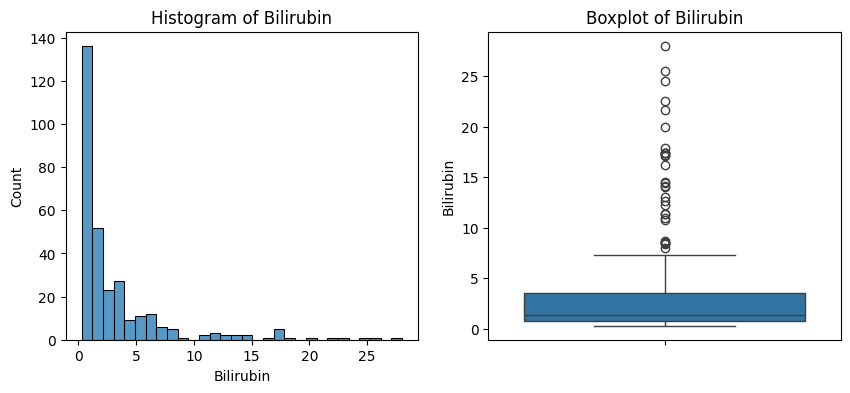

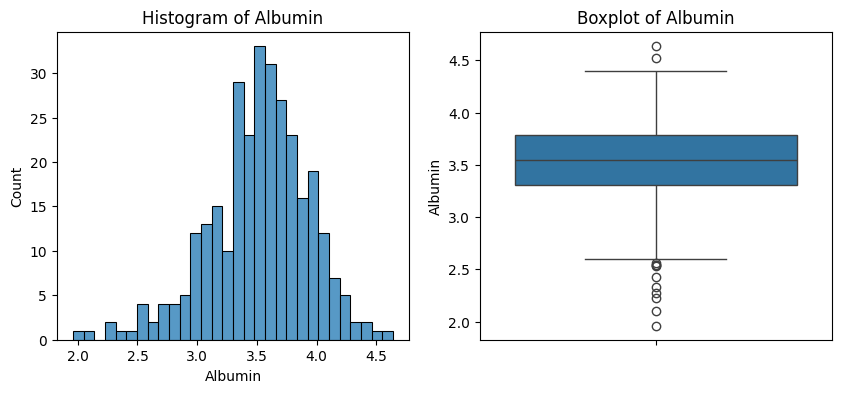

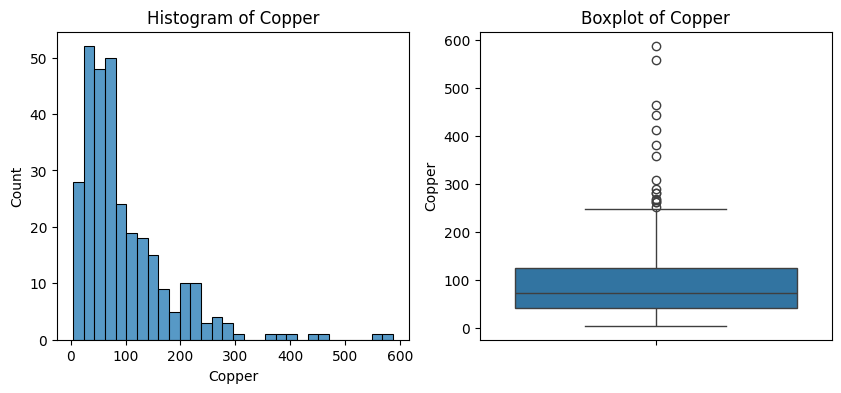

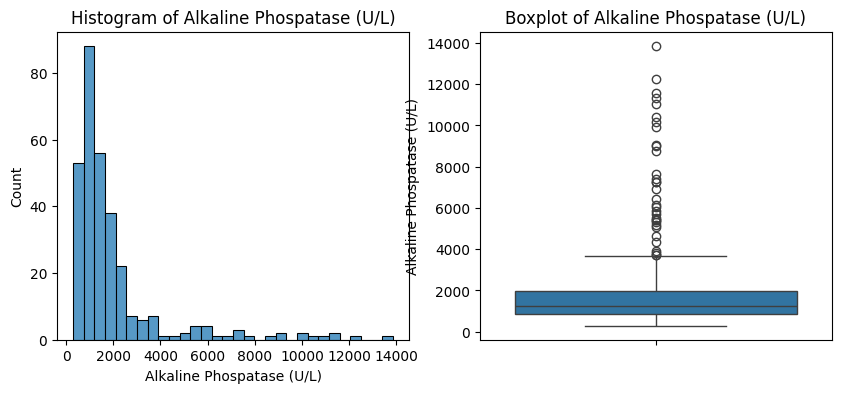

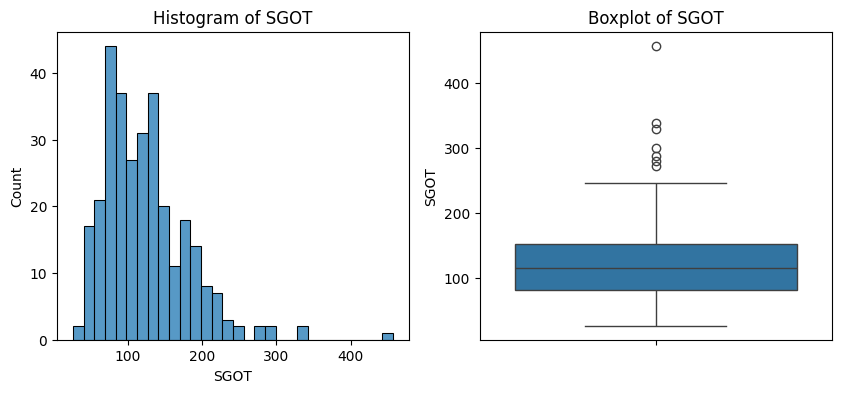

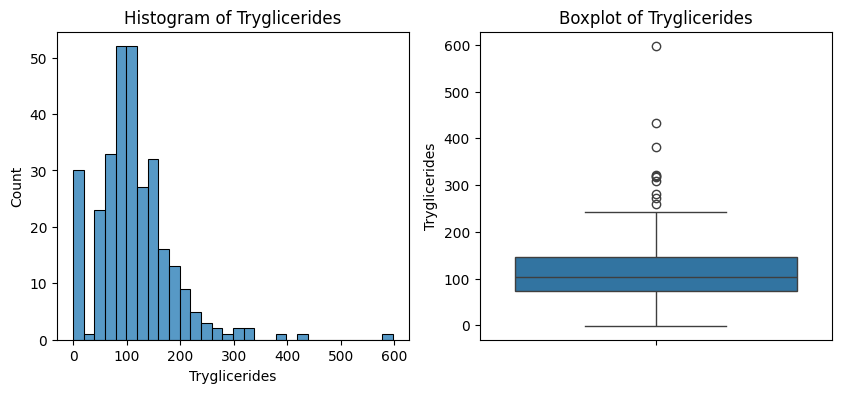

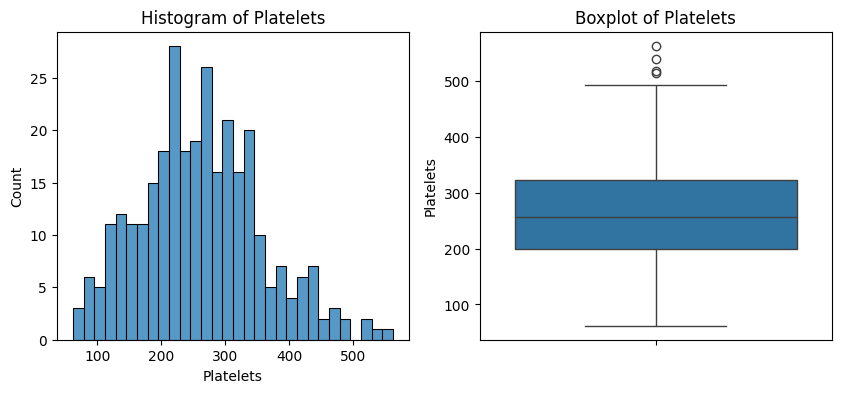

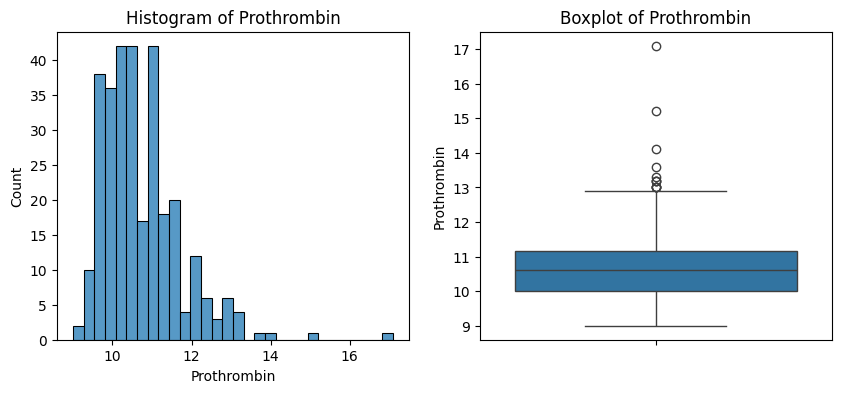

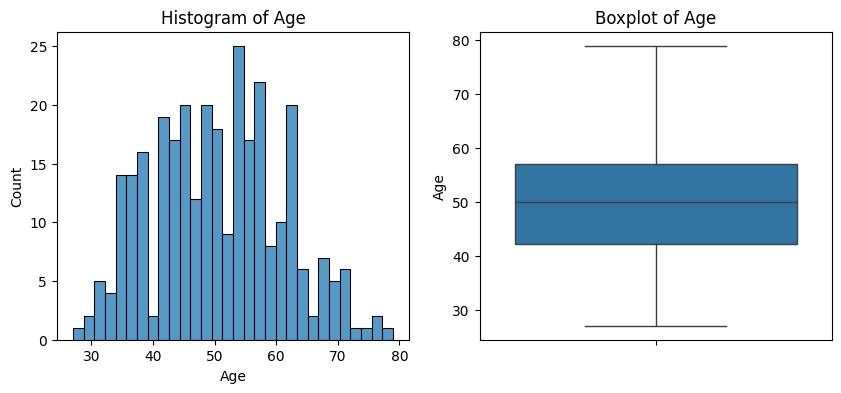

In [20]:
# check outliers and distribution for each numerical columns

def check_outlier_dist_num(df, num):
  for col in num:
    plt.figure(figsize=(10,4)) # making the base figure

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30) # histogram to see the distribution of each attributes within 30 pieces, because using 20 and 25 is not really good representing the distributiion in my opinion
    plt.title(f"Histogram of {col}") # title

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col]) # boxplot of each attributes to see the potential outliers
    plt.title(f"Boxplot of {col}") # title

    plt.show()

check_outlier_dist_num(dataset[num_cols], num_cols)

Between 9 attibutes above, i can conclude that all these 9 attributes almost normally distributed except Bilirubin and Alkaline Phospatase (U/L), i mean it's not really normally distributed.  
Meanwhile the boxplots showing outliers from each attributes, but i think these outliers are still acceptable and reasonable. Because each patients has their own health conditions, and it's still normal overall. So i won't remove the outliers.

<ipython-input-21-6f22c991ec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')  # using countplot, because the attributes are categorical


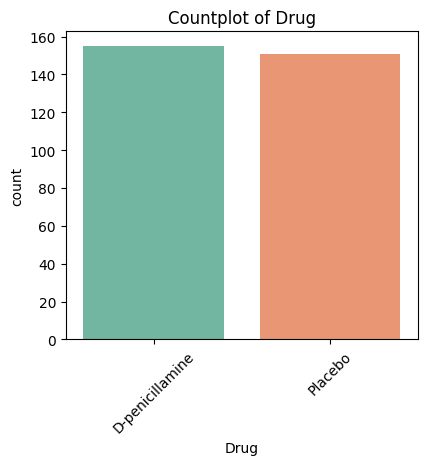

<ipython-input-21-6f22c991ec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')  # using countplot, because the attributes are categorical


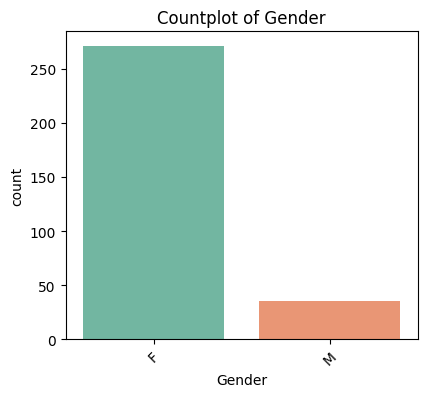

<ipython-input-21-6f22c991ec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')  # using countplot, because the attributes are categorical


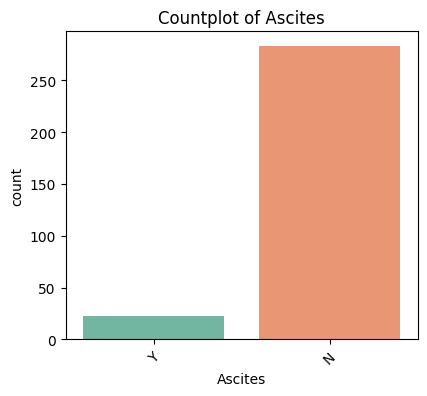

<ipython-input-21-6f22c991ec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')  # using countplot, because the attributes are categorical


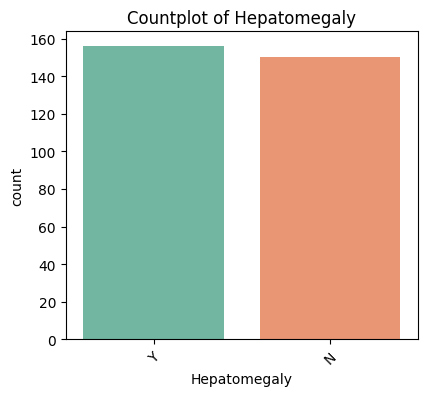

<ipython-input-21-6f22c991ec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')  # using countplot, because the attributes are categorical


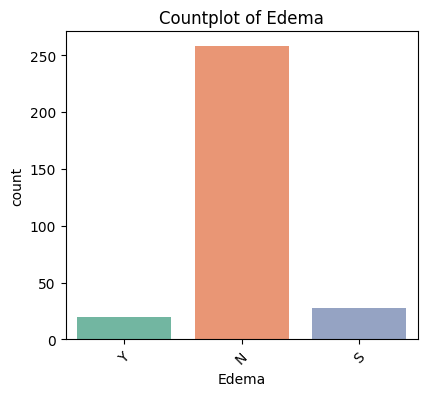

<ipython-input-21-6f22c991ec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')  # using countplot, because the attributes are categorical


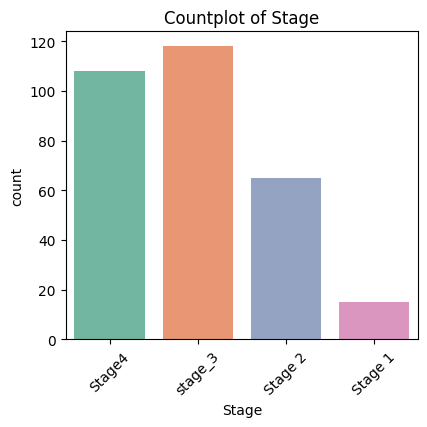

In [21]:
# check outliers and distribution for each categorical columns

def check_outlier_dist_cat(df, cat):
  for col in cat:
    plt.figure(figsize=(10,4)) # making the base figure

    plt.subplot(1, 2, 1)
    sns.countplot(df, x=col, palette='Set2')  # using countplot, because the attributes are categorical
    plt.title(f'Countplot of {col}') # title
    plt.xticks(rotation=45) # rotate the label, because the drug part is a little bit unreadable

    plt.show()

check_outlier_dist_cat(dataset[cat_cols], cat_cols)

The Drug column tells us that the amount of D-penicillamine given are a little bit higher than Placebo.
The Gender column tells us the most patient’s gender are dominated by Female  
The Ascites column showing us that most of the patients does not have presence of ascites  
The Hepatomegaly column is very good, it shows a balance graphs between Yes and No  
The Edema column shows the most of the patients does not have edema  
The Stage column is the predicted label and showing the distribution among them



## Exploratory Data Analysis (EDA)

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


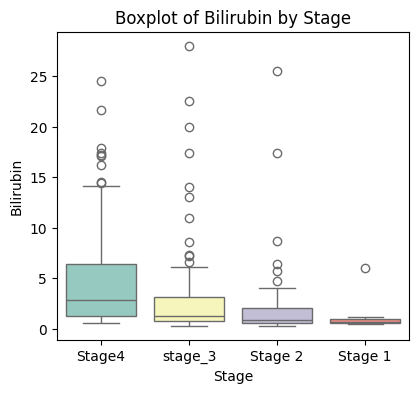

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


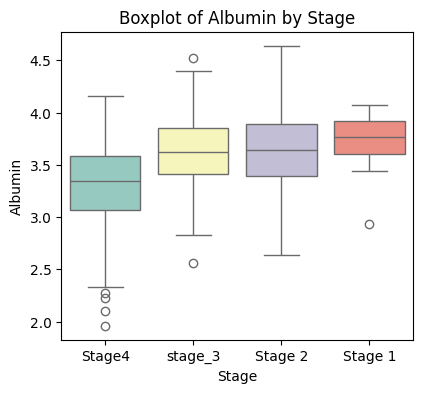

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


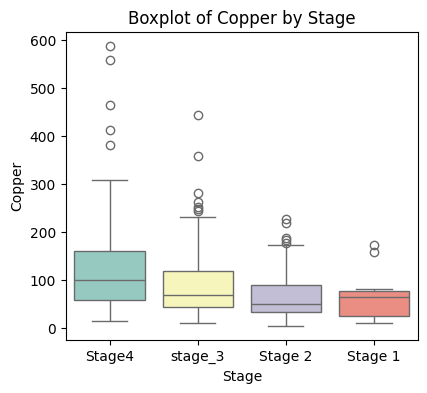

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


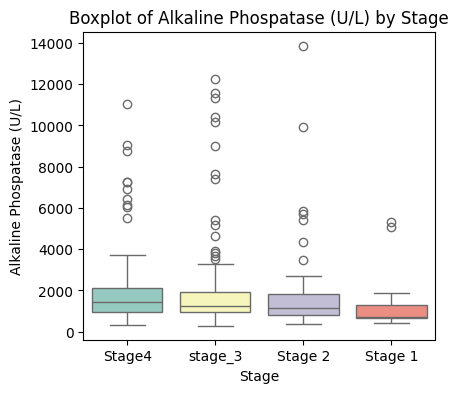

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


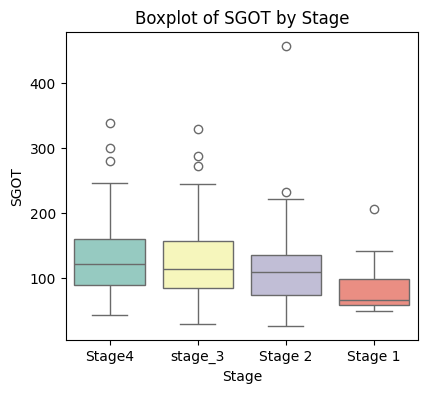

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


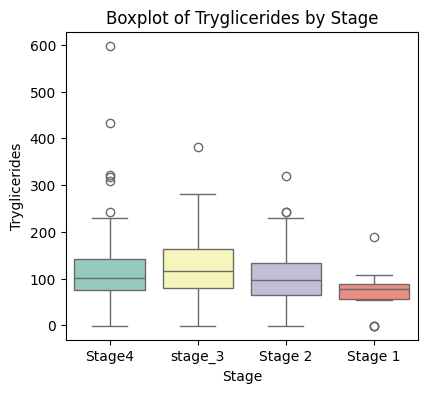

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


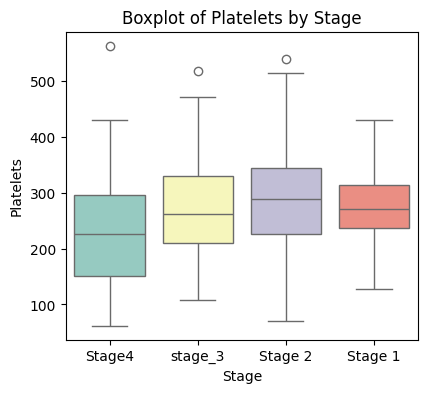

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


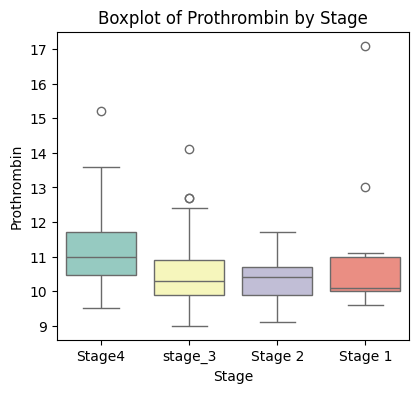

<ipython-input-22-edf01008e049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution


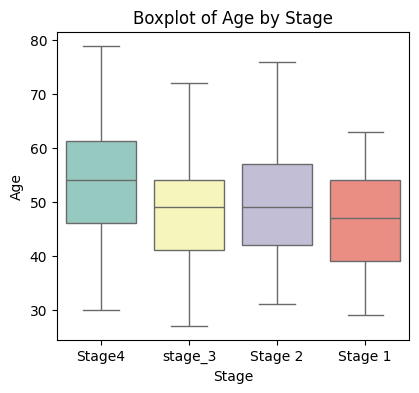

In [22]:
def check_num_dist_stage(df, num):
  for col in num:
    plt.figure(figsize=(10, 4)) # base figure

    plt.subplot(1,2,1)
    sns.boxplot(data=df, x='Stage', y=col, palette='Set3')  # boxplot for numerical distribution
    plt.title(f'Boxplot of {col} by Stage') # title

    plt.show()

check_num_dist_stage(dataset, num_cols)

The Bilirubin boxplot showing the larger range of serum bilirubin from each patient especially on stage 4 and 3. So the lower the stage of cirrhosis the less it’s bilirubin serum.  
The Albumin boxplot shows that the higher the cirrhosis stage, the wider the range of Albumin of each patients. The lower the stage of cirrhosis, the albumin range is also shrinking, but the median are slightly went higher.  
The copper boxplot showing that the range amount of copper is shrinking in proportion of decreasing stage. So the lower the stage, the amount of copper is less.  
The Alkaline Phospatase tells us that stage 4 has the widest range among the other stage, while the others shrinking slightly.  
The SGOT tells us that stage 1 has the least data range, meanwhile the higher the stage, the larger the data span.  
The Tryglicerides plot tells us that stage 3 has the highest tryglicerides range among all the other stages. But if the values are a little bit too high, it’s most likely classified as stage4.  
The Platelets shows that stage4 and stage_3 have a quite similar range, but stage_3 has a little bit higher range compared to stage 4. Meanwhile stage 2 has the widest range of platelets among all the stages.  
The Prothrombin shows a negative linear relationship that stage4 most likely takes more time than any other stages.  
The Age tells us that the patients on stage 1 are most likely younger than any patients on other stages. So we can conclude that the older they gets, they’re most likely classified with higher stages.



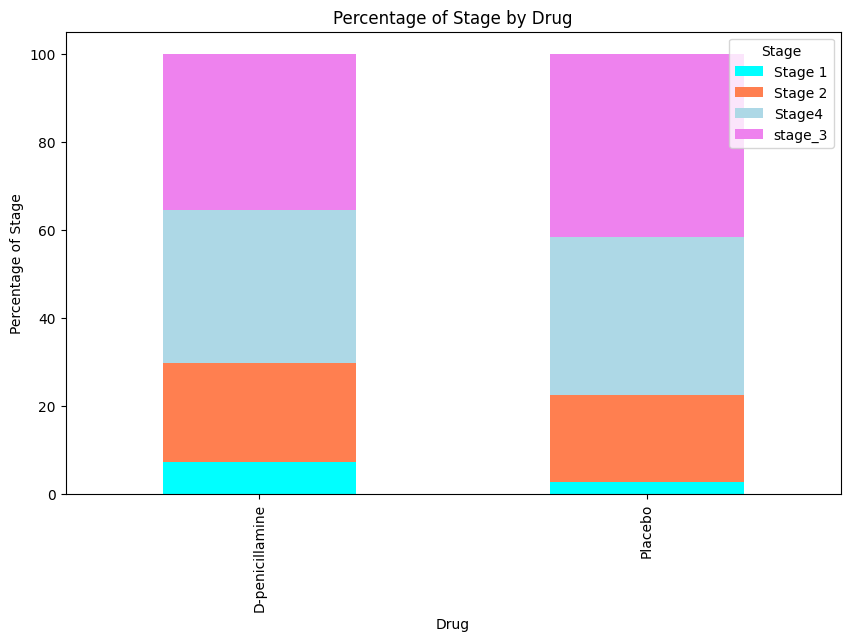

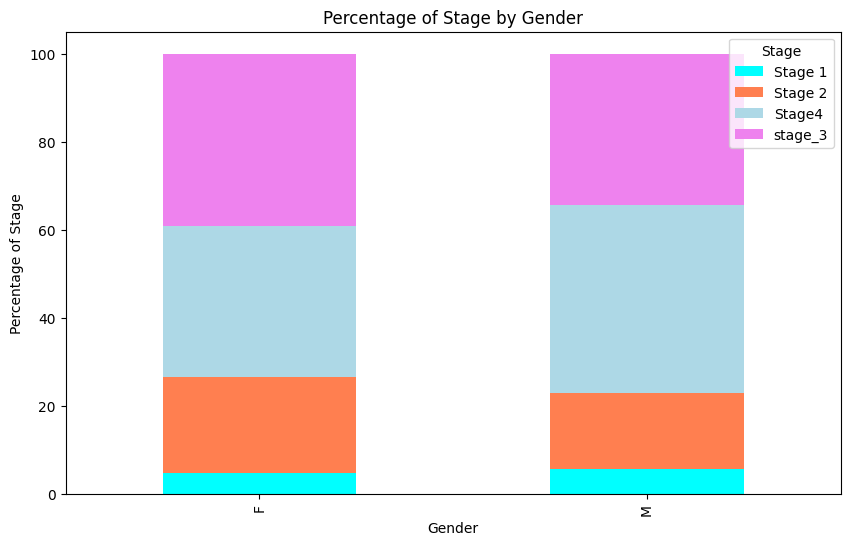

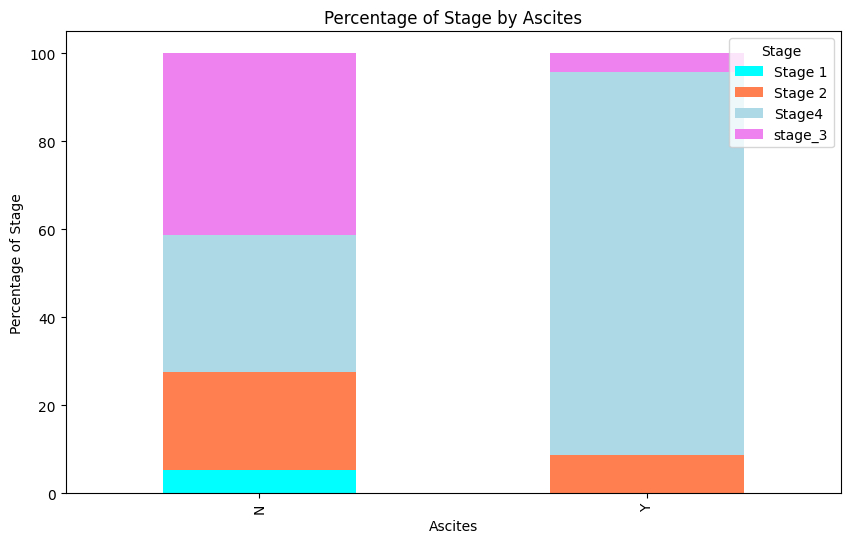

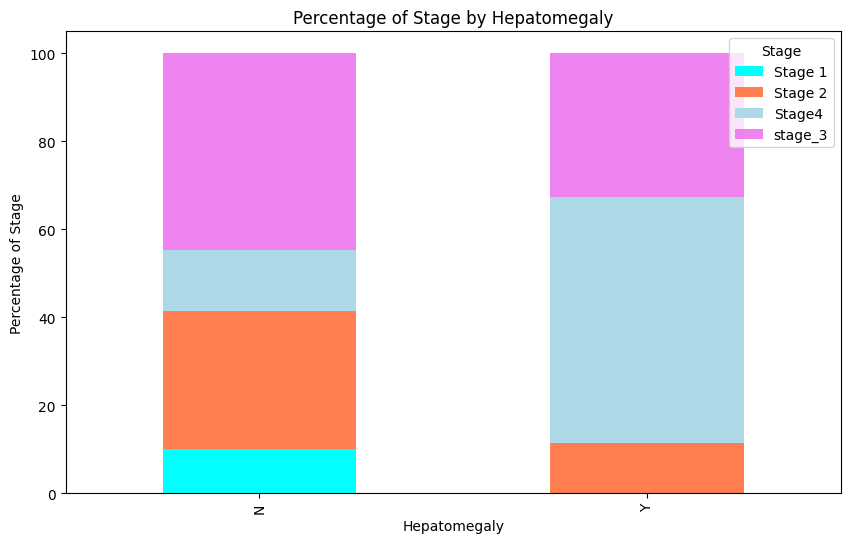

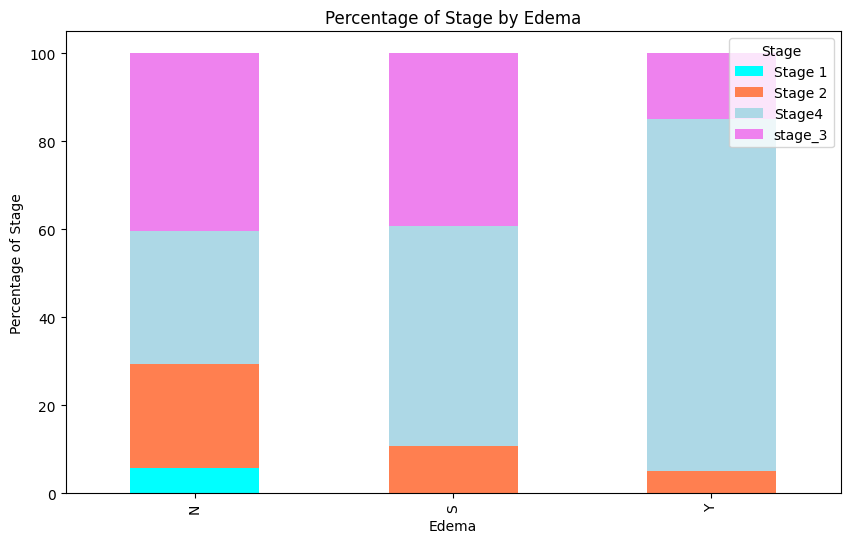

In [23]:
def check_cat_dist_stage_percentage(df, cat):
  for col in cat:
    if col == 'Stage':  # skip column Stage
      continue

    # group data and calculate the percentage
    data_grouping = df.groupby([col, 'Stage']).size().unstack()
    data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100

    # plotting
    data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral', 'lightblue', 'violet'], figsize=(10, 6))
    plt.title(f'Percentage of Stage by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage of Stage')
    plt.legend(title='Stage', loc='upper right')
    plt.show()

check_cat_dist_stage_percentage(dataset, cat_cols)


Conclusion from each attributes :
-	Drug : there are a quite difference which is D-penicillamine are given more on Stage 1, 2 , and 4 meanwhile Placebo are given more to Stage 3.
-	Gender : there are a pattern where Female dominated more on stage 2 and 3
-	Ascites : it shows a significant difference especially the presence of ascites is dominated by stage4
-	Hepatomegaly : it is showing a quite significant difference between each stage on the presence of hepatomegaly
-	Edema : shows a difference between the presence of edema on each stages of cirrhosis.


### Shapiro Test

In [24]:
for i in num_cols:
  if(i == 'Stage'):
    continue
  print(i, shapiro(dataset[i])) # checking the normality distribution of each numerical columns

Bilirubin ShapiroResult(statistic=0.6260729010311376, pvalue=2.651784631728777e-25)
Albumin ShapiroResult(statistic=0.9797778235186683, pvalue=0.00025741803714511384)
Copper ShapiroResult(statistic=0.7900237787922918, pvalue=1.463429754493277e-19)
Alkaline Phospatase (U/L) ShapiroResult(statistic=0.6123021951338488, pvalue=1.0898395204675184e-25)
SGOT ShapiroResult(statistic=0.9120212343291327, pvalue=2.1411575836744633e-12)
Tryglicerides ShapiroResult(statistic=0.8889099488770487, pvalue=3.843630049820408e-14)
Platelets ShapiroResult(statistic=0.9880042168947346, pvalue=0.012354922069453503)
Prothrombin ShapiroResult(statistic=0.8831713614020146, pvalue=1.552008405912485e-14)
Age ShapiroResult(statistic=0.9890212826541597, pvalue=0.020787751009169724)


as we can see here, non of these numeric columns p value's bigger than 0.05 which means non of them were normally distributed. Therefore i cannot use standard / minmax scaler due to this unnormally distributed data and it has some outliers. So i decided to use robust scaler because it's more robust and has more advantage to deal with this kind of problem.

### Check Significant Difference

In [25]:
# because all the attributes were not normally distributed, therefore i must use Kruskal-Wallis
# here i'll test the attributes that doesn't really showing the pattern

# grouping data based on stage
grouped_data = [dataset[dataset['Stage'] == stage]['Albumin'] for stage in ['Stage 1', 'Stage 2', 'stage_3', 'Stage4']]

h_statistic, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal Wallis : H-statistic = {h_statistic}, pvalue = {p_value}") # showing the h statistics and p value
# as we can see the h-stats value is big and also the pvalue is less than 0.05 which indicates there are a significant difference

Kruskal Wallis : H-statistic = 43.4009429358287, pvalue = 2.022908614422319e-09


<ipython-input-25-5f64c3cecf9d>:7: DeprecationWarning: Please import `kruskal` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  h_statistic, p_value = stats.kruskal(*grouped_data)


In [26]:
# grouping data based on stage
grouped_data = [dataset[dataset['Stage'] == stage]['Tryglicerides'] for stage in ['Stage 1', 'Stage 2', 'stage_3', 'Stage4']]

h_statistic, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal Wallis : H-statistic = {h_statistic}, pvalue = {p_value}") # showing the h statistics and p value
# as we can see the h-stats value is big enough and also the pvalue is less than 0.05 which indicates there are a significant difference

Kruskal Wallis : H-statistic = 13.996970964912592, pvalue = 0.0029092787097336065


<ipython-input-26-f1e3c107b220>:4: DeprecationWarning: Please import `kruskal` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  h_statistic, p_value = stats.kruskal(*grouped_data)


In [27]:
# grouping data based on stage
grouped_data = [dataset[dataset['Stage'] == stage]['Platelets'] for stage in ['Stage 1', 'Stage 2', 'stage_3', 'Stage4']]

h_statistic, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal Wallis : H-statistic = {h_statistic}, pvalue = {p_value}") # showing the h statistics and p value
# as we can see the h-stats value is big enough and also the pvalue is less than 0.05 which indicates there are a significant difference

Kruskal Wallis : H-statistic = 20.872016659878724, pvalue = 0.00011191943568828017


<ipython-input-27-04e4a68e53b2>:4: DeprecationWarning: Please import `kruskal` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  h_statistic, p_value = stats.kruskal(*grouped_data)


In [28]:
# grouping data based on stage
grouped_data = [dataset[dataset['Stage'] == stage]['Age'] for stage in ['Stage 1', 'Stage 2', 'stage_3', 'Stage4']]

h_statistic, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal Wallis : H-statistic = {h_statistic}, pvalue = {p_value}") # showing the h statistics and p value
# as we can see the h-stats value is big enough and also the pvalue is less than 0.05 which indicates there are a significant difference

Kruskal Wallis : H-statistic = 13.899345265239551, pvalue = 0.003045412305768541


<ipython-input-28-993ff6182175>:4: DeprecationWarning: Please import `kruskal` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  h_statistic, p_value = stats.kruskal(*grouped_data)


Based on these test i've done, none of the p values are bigger than 0.05, this means that they all had a significant difference

## EDA Summary
Based on the EDA process i've done the dataset is pretty clean in context duplication, because there are no duplication. But there are a bit mispelled values in 'Drug' column and so many missing values found, but i already cleaned it by dropping the missing values, i dropped it because i'm avoiding any synthetics data especially about patients health conditions. There are some outliers found, but again i think it's still acceptable referring to each patients medical conditions.  
The predicted labels distribution is quite focused on stage 3 and 4 which might leads the modelling process to be bias, therefore i'll use robust scaler so the data will more normally distributed. Stage 1 means that it is the least crucial of cirrhosis and 4 means that it is the most crucial stage of cirrhosis.

# 1.B

## Data Preprocessing

### Outlier Handling
Because all the outliers seems reasonable and make sense, therefore i won't do anything to handle this

### Selecting Features
Because i'll use all the rest attributes, therefore i don't have to select / drop the unnecessary columns.

## Encoding
Because in machine learning training and modelling only allow to accept numerical data, therefore we should encode the categorical to numerical data types.  
But as we can see from the dataset, the existing categorical data consist of nominal and ordinal data.  
Therefore we must treat it differently.

- Drug : nominal columns (categorical)
- Gender : nominal columns (categorical)
- Ascites : nominal columns (categorical)
- Hepatomegaly : nominal columns (categorical)
- Edema : ordinal columns (categorical)
- Stage : ordinal columns (categorical)

In [29]:
# specify the nominal columns
nominal_columns = ["Drug", "Gender", "Ascites", "Hepatomegaly"]
print(nominal_columns)

['Drug', 'Gender', 'Ascites', 'Hepatomegaly']


In [30]:
# specify the ordinal column
ordinal_columns = ["Edema", "Stage"]
print(ordinal_columns)

['Edema', 'Stage']


In [31]:
# one hot encoding for the nominal columns
one_hot_encoding = OneHotEncoder(sparse_output=False)
nom_cols_encoded = one_hot_encoding.fit_transform(dataset[nominal_columns])
encoded_nom_dataset = pd.DataFrame(nom_cols_encoded, columns=one_hot_encoding.get_feature_names_out(nominal_columns))
encoded_nom_dataset.head() # check the encoding results

,Drug_D-penicillamine,Drug_Placebo,Gender_F,Gender_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [32]:
# ordinal encoding for ordinal column
ordinal_ordering = [["N", "S", "Y"],  # Edema ordering
    ["Stage 1", "Stage 2", "stage_3", "Stage4"] # Stage ordering
]
ordinal_encoding = OrdinalEncoder(categories=ordinal_ordering)
ord_cols_encoded = ordinal_encoding.fit_transform(dataset[ordinal_columns])
encoded_ord_dataset = pd.DataFrame(ord_cols_encoded, columns=ordinal_encoding.get_feature_names_out(ordinal_columns))
encoded_ord_dataset.head()

,Edema,Stage
0,2.0,3.0
1,0.0,2.0
2,1.0,3.0
3,1.0,3.0
4,0.0,2.0


In [33]:
# merge these 2 encoded columns
encoded_dataset = pd.concat([encoded_nom_dataset, encoded_ord_dataset], axis=1)
encoded_dataset.head()

,Drug_D-penicillamine,Drug_Placebo,Gender_F,Gender_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Edema,Stage
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0


In [34]:
# combine the encoded columns into the dataframe, and delete the unencoded nominal columns
final_dataset = pd.concat([dataset.drop(columns=nominal_columns + ordinal_columns), encoded_dataset.astype("int")], axis=1)
final_dataset.head()

,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age,Drug_D-penicillamine,Drug_Placebo,Gender_F,Gender_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Edema,Stage
0,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,59,1,0,1,0,0,1,0,1,2,3
1,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,57,1,0,1,0,1,0,0,1,0,2
2,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,71,1,0,0,1,1,0,1,0,1,3
3,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,55,1,0,1,0,1,0,0,1,1,3
4,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,39,0,1,1,0,1,0,0,1,0,2


## Splitting to Train and Test Data


In [35]:
x = final_dataset[final_dataset.columns.drop(["Stage"])]  # select the dataset excluding the predicted value which is Stage
y = final_dataset["Stage"] # as predicted value
x.head() # the Stage is no longer inside the main dataset

,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age,Drug_D-penicillamine,Drug_Placebo,Gender_F,Gender_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Edema
0,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,59,1,0,1,0,0,1,0,1,2
1,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,57,1,0,1,0,1,0,0,1,0
2,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,71,1,0,0,1,1,0,1,0,1
3,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,55,1,0,1,0,1,0,0,1,1
4,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,39,0,1,1,0,1,0,0,1,0


In [36]:
y.head() # here is the Stage column

,Stage
0,3
1,2
2,3
3,3
4,2


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=128)
print(x_train.shape, x_test.shape)  # as we can see, here the train and test data are well separated
# the train data consist of 244 rows and 18 cols, meanwhile the test data consist of 62 rows and 18 cols

(244, 18) (62, 18)


## Scaling
changing the scale or range of numerical features to make it more proportional one to another

In [38]:
# here i'll use robust scaler, because i didn't handle the outliers and it's more robust to outlier.

# all the features have some outliers, only age that has not outliers
outliers_cols = ['Bilirubin', 'Albumin', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# using robust scaler function
robust_scaler = RobustScaler()
x_train[outliers_cols] = robust_scaler.fit_transform(x_train[outliers_cols])  # fitting the scaler into the columns with outlier, remember fitting is only allowed during training
x_test[outliers_cols] = robust_scaler.transform(x_test[outliers_cols])

## Modelling

### Random Forest

In [39]:
# training model
model = RandomForestClassifier(n_estimators=110, random_state=128, n_jobs=-1)
model = model.fit(X = x_train, y = y_train)

# predicting label
y_pred = model.predict(x_test)

#### Evaluation

In [40]:
# this matrix showing the true negative, false positive, false negative, and true positive
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")  # showing the classification report from sklearn metric
print(classification_report(y_test, y_pred))

# as we can see here, this model is not really good in modelling the cirrhosis stage
# the precision, recall, and f1-score is pretty low, especially on stage 1 and 2 all of them below 50 %
# from those 4 stages, the best among them is the stage 4, with stage 3 it still not really good.
# therefore the result is not really satisfied my expectation

print("Accuracy:", accuracy_score(y_test, y_pred), '\n') # the accuracy of this model is quite good, around 52 %

Confusion Matrix:
[[ 0  1  3  0]
 [ 0  3  6  1]
 [ 0  4 10  4]
 [ 0  2  9 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.30      0.30      0.30        10
           2       0.36      0.56      0.43        18
           3       0.79      0.63      0.70        30

    accuracy                           0.52        62
   macro avg       0.36      0.37      0.36        62
weighted avg       0.54      0.52      0.52        62

Accuracy: 0.5161290322580645 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Fine Tuning using RandomizedSearchCV and Evaluating
Fine tuning to see if the results are getting better or not

In [41]:
# Define the parameter grid
parameters = {
    'n_estimators': [100, 150, 200],      # number of trees
    'max_depth': [5, 7, 13],              # maximum depth
    'min_samples_split': [2, 5, 8],       # minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],         # minimum samples in leaf node
    'bootstrap': [True, False],            # use bootstrap / no
    'max_features': ['sqrt', 'log2', None]      # max features
}

# initialize model
rand_for_class = RandomForestClassifier(random_state=128)
random_search_cv = RandomizedSearchCV(estimator=rand_for_class,
                                      param_distributions=parameters,
                                      n_iter=10,
                                      cv=5,
                                      verbose=2,
                                      random_state=128,
                                      n_jobs=-1,
                                      scoring='accuracy')

# searching inside the training data
random_search_cv.fit(x_train, y_train)

print(f"Best Hyperparameters: {random_search_cv.best_params_}")
print(f"Best Score: {random_search_cv.best_score_}", '\n')  # this is the best score from the best parameters

# best model and evaluation
best_predict_model = random_search_cv.best_estimator_
y_pred = best_predict_model.predict(x_test)

# confusion matrix
print("Confusion Matrix:")  # first step in evaluate model
print(confusion_matrix(y_test, y_pred))  # second step in evaluate model

# Showing the accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred), '\n')  # the accuracy after fine-tuning is going up to 53 %
print(classification_report(y_test, y_pred))  # the accuracy went up around 1 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
Best Score: 0.5245748299319728 

Confusion Matrix:
[[ 0  1  3  0]
 [ 0  2  7  1]
 [ 0  3 12  3]
 [ 0  1 10 19]]

Accuracy: 0.532258064516129 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.29      0.20      0.24        10
           2       0.38      0.67      0.48        18
           3       0.83      0.63      0.72        30

    accuracy                           0.53        62
   macro avg       0.37      0.38      0.36        62
weighted avg       0.55      0.53      0.52        62



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost Algorithm

In [42]:
# training model
model = XGBClassifier(random_state=128)
model.fit(x_train, y_train)

# # predicting label
y_pred = model.predict(x_test)

#### Evaluation

In [43]:
# this matrix showing the true negative, false positive, false negative, and true positive
print("Confusion Matrix:")  # first step in evaluate model
print(confusion_matrix(y_test, y_pred)) # second step in evaluate model

print("\nClassification Report:")  # showing the classification report from sklearn metric
print(classification_report(y_test, y_pred))

# as we can see here, this model is not really good also in modelling the cirrhosis stage
# the precision, recall, and f1-score is showing a little bit difference but not that many
# overall the results are quite similar to random forest

print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy of this model is slightly lower, around 50 %

Confusion Matrix:
[[ 0  0  4  0]
 [ 0  2  5  3]
 [ 2  2 11  3]
 [ 0  3  9 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.29      0.20      0.24        10
           2       0.38      0.61      0.47        18
           3       0.75      0.60      0.67        30

    accuracy                           0.50        62
   macro avg       0.35      0.35      0.34        62
weighted avg       0.52      0.50      0.50        62

Accuracy: 0.5


#### Fine Tuning using RandomizedSearchCV and Evaluating
Because the results are not good, i decided to do fine tuning to see if the results are getting better or not

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # number of trees
    'max_depth': [3, 5, 7],  # maximum depth
    'learning_rate': [0.05, 0.1, 0.2],   # step size for updating weights
    'subsample': [0.6, 0.8, 1.0],  # fraction of the training data
    'colsample_bytree': [0.5, 0.7, 0.9],   # fraction of features sampled randomly for each tree
    'gamma': [0, 0.05, 0.1],   # minimum loss reduction
    'min_child_weight': [1, 2, 4]   # minimum child weight
}

# initialize model
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=128)
random_search_cv = RandomizedSearchCV(estimator=xgb_classifier,
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=5,
                                verbose=2,
                                random_state=128,
                                n_jobs=-1,
                                scoring='accuracy')

# searching inside the training data
random_search_cv.fit(x_train, y_train)

print(f"Best Hyperparameters: {random_search_cv.best_params_}")
print(f"Best Score: {random_search_cv.best_score_}") # this is the best score from the best parameters

# best model and evaluation
best_model_xgb = random_search_cv.best_estimator_
y_pred = best_model_xgb.predict(x_test)

# confusion matrix
print("Confusion Matrix:")  # first step in evaluate model
print(confusion_matrix(y_test, y_pred)) # second step in evaluate model

print("\nAccuracy:", accuracy_score(y_test, y_pred), '\n') # the accuracy after fine tuning is going up to 52 %
print(classification_report(y_test, y_pred)) # the accuracy went up around 2 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best Score: 0.45892857142857146
Confusion Matrix:
[[ 0  1  2  1]
 [ 0  3  5  2]
 [ 1  3 11  3]
 [ 0  3  9 18]]

Accuracy: 0.5161290322580645 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.30      0.30      0.30        10
           2       0.41      0.61      0.49        18
           3       0.75      0.60      0.67        30

    accuracy                           0.52        62
   macro avg       0.36      0.38      0.36        62
weighted avg       0.53      0.52      0.51        62



# 1.C

From the accuracy aspect as we can see that the random forest model is around 53 % meanwhile the xgboost model is around 52 %. The difference between these 2 models aren’t that much, only 1 %. So, their accuracy in prediction is quite similar, which basically not that good, because they only able to classify 52-53 % from the total data, which is not good.  
From the precision aspect on the random forest and xgboost model we can see that stage 4 has the highest precision between the other stages. This means that most of the data correctly predicted are on stage 4.  
From the F1-score especially on random forest it’s score are slightly lower than xgboost model especially on stage 1-3. This means xgboost are better explaining the f1-score on stage 1-3 meanwhile random forest is better explaining the stage 4.  
So, the conclusion is, the best model is Random Forest, because overall based on the classification report results, it has a slightly better in many aspects rather than xgboost. The Accuracy also a little bit higher, but i can't say that both of them are good in modelling the prediction, but if we're talking about which one better, i'll go with random forest.

# 1.D

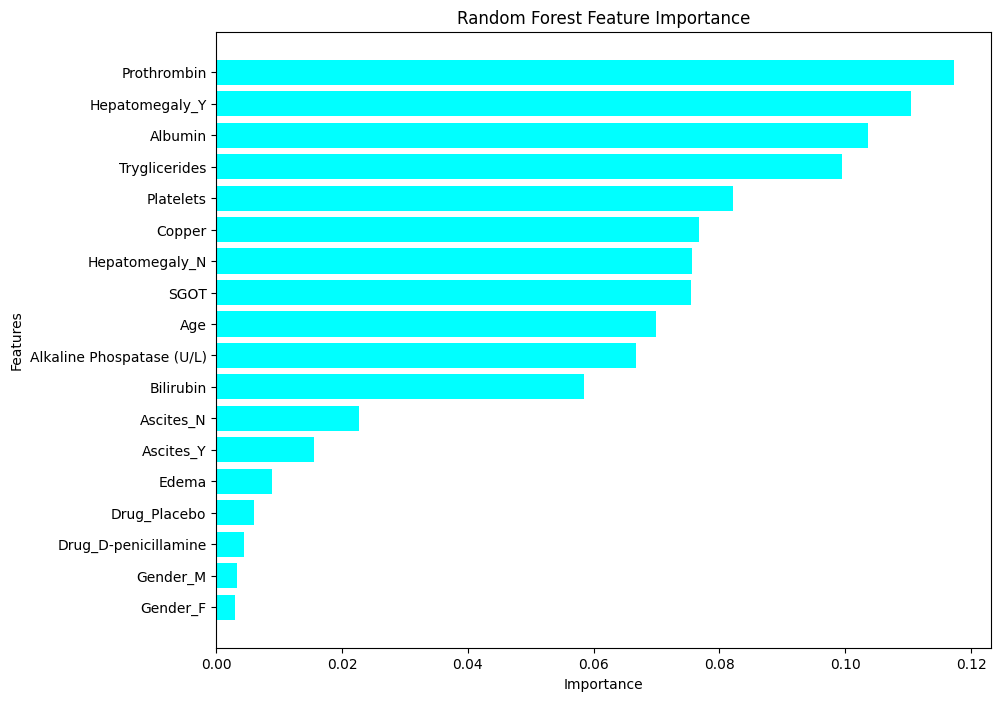

In [45]:
# access feature importance
rf_importance_scores  = best_predict_model.feature_importances_
rf_feature_labels  = x_train.columns  # use x_train

# make dataframe
rf_importance_df  = pd.DataFrame({'Feature': rf_feature_labels , 'Importance': rf_importance_scores }).sort_values(by='Importance', ascending=False)

# plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(rf_importance_df ['Feature'], rf_importance_df ['Importance'], color='cyan') # horizontal bar
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # inverting
plt.show()


Prothrombin Time is the most important feature because it shows how the liver can produce clotting factors. Hepatomegaly_Y, Albumin, and Triglycerides also helps to understand liver function and overall health. Hepatomegaly_Y tells us if the liver is enlarged, which is common in liver diseases. Albumin, a protein made by the liver, and Triglycerides, a fat measurement, also give important information about liver health and metabolism. Meanwhile for Gender and Drug types were not that important because the impact on the results are not that much.

Therfore i can conclude that mostly the most important features are those directly connected to liver function and blood clotting.